# Random Walk
Calculation of end-to-end distance, radius of gyration, end monomer distribution

Radius of gyration: 
$R_g^2 = \frac{1}{N} \sum_i (\vec{r}_i - \vec{r}_{com})^2$

End to end position distribution 1D:
$P_{1D}(N,x) = \frac{1}{\sqrt{(2 \pi N b^2 )}} e^{-\frac{x^2}{2Nb^2}} = 1/(2\pi R2) \exp(- x^2 / R2)$

End to end position distribution radial:
$P_{rad}(N,R) 4\pi R^2 dR = 4 \pi \left( \frac{3}{2 \pi N b^2 } \right)^{3/2}  e^{-\frac{3 R^2}{2Nb^2}} R^2 dR = 4\pi (3/2 \pi R2) \exp(- 3 x^2 / 2 R2)$

Programming soft skills:
[docstrings](https://cito.github.io/byte_of_python/read/docstrings.html)

Load environments

In [1]:
%pylab notebook
# import pandas as pd
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [72]:
# define class random walker (N, steps, full path, endpos; createRandomPath, calc Ree, calc Rg, plot path, performMCS)
class randomWalk:
    ''' definition of class radnom walk contianng the full path, the path length and steps along the principal lattice axis '''
    def __init__(self, N_):
        ''' initialize empty path and and start and end position in origin '''
        self.N = N_
        self.fullPath = np.zeros((2))
        self.start = np.zeros((2))
        self.end = np.zeros((2))
        self.currentPos = np.copy(self.start)
        self.steps = [(0,1),(0,-1),(-1,0),(1,0)]
        
    def createRandomPath(self):
        ''' create random path of length N '''
        self.fullPath   = np.copy(self.start)
        self.currentPos = np.copy(self.start)
        
        for i in range(self.N):
            self.currentPos += self.steps[random.randint(4)]
            self.fullPath = np.vstack( (self.fullPath, self.currentPos) )
        
        self.end = np.copy(self.currentPos)
        
    def plotPath(self):
        ''' plot the current full path '''
        figure()
        scatter(self.fullPath[:,0],self.fullPath[:,1], color="olive")
        plot(self.fullPath[:,0],self.fullPath[:,1], color="olive")
        plot(self.fullPath[0,0],self.fullPath[0,1], "r+", label="start")
        plot(self.fullPath[-1,0],self.fullPath[-1,1], "go", label="end")
        legend(loc="best")
        show()
        
    def getEndToEndVector(self):
        ''' get the current end to end vector '''
        return (self.end - self.start)
    
    def getRadiusOfGyration(self):
        ''' get the radius of gyration of the current path '''
        com = np.sum(self.fullPath, axis = 0)/self.fullPath.shape[0]
        return np.sum( np.square(self.fullPath - com) )/self.fullPath.shape[0]
    
    def perfomMCS(self,t):
        ''' perform importance sampling t-times '''
        if (self.fullPath.shape[0] != self.N+1):
            self.createRandomPath()
            
        for i in range(t):
            for n in range(self.N):
                randomIdx = random.randint(self.N)

                if (randomIdx == 0):
                    diff = self.fullPath[1]-self.fullPath[0]
                    newStep = self.steps[random.randint(4)]
                    while ( newStep[0] == diff[0] and newStep[1] == diff[1] ):
                        newStep = self.steps[random.randint(4)]
                    #print(randomIdx, self.fullPath[0], self.fullPath[1], diff, newStep, self.fullPath[1] + newStep)
                    self.fullPath[0] = self.fullPath[1] + newStep
                    self.start = np.copy(self.fullPath[0])
                    #print(randomIdx,diff, self.fullPath[0])

                elif (randomIdx == self.N-1):
                    diff = self.fullPath[-2]-self.fullPath[-1]
                    newStep = self.steps[random.randint(4)]
                    while ( newStep[0] == diff[0] and newStep[1] == diff[1] ):
                        newStep = self.steps[random.randint(4)]
                    #print(randomIdx, self.fullPath[-1], self.fullPath[-2], diff, newStep, self.fullPath[-2] + newStep)
                    self.fullPath[-1] = self.fullPath[-2] + newStep
                    self.end = np.copy(self.fullPath[-1])
                else:
                    diff1 = self.fullPath[randomIdx-1] - self.fullPath[randomIdx]
                    diff2 = self.fullPath[randomIdx+1] - self.fullPath[randomIdx]
                    
                    # check if +-o-+
                    if not ( diff1[0] == -diff2[0] and diff1[0] == -diff2[1] ):
                        self.fullPath[randomIdx] += (diff1+diff2)

                        
                    
        return True

# define the functions to compare with ( 1D Gaussian, radialGaussian, powerLaw)

<IPython.core.display.Javascript object>


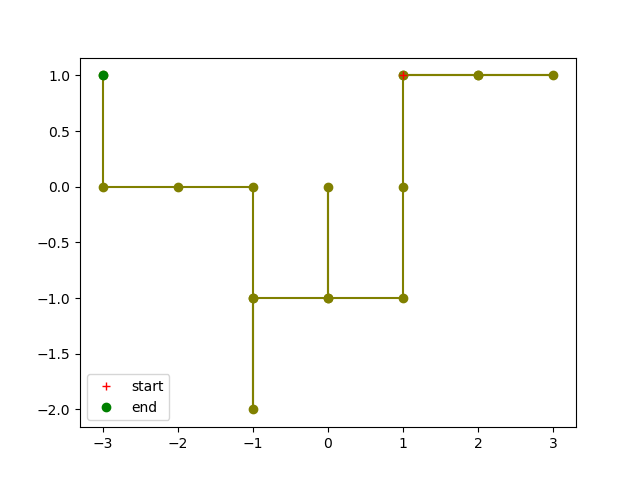

<IPython.core.display.Javascript object>


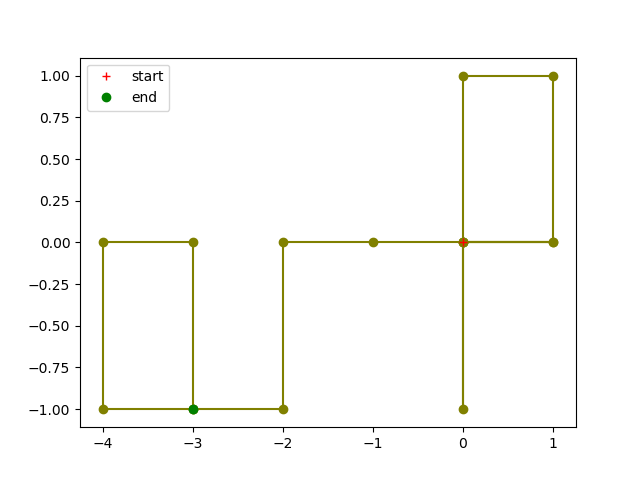

In [77]:
# make some test output
#hugo = randomWalk(16)
#hugo.createRandomPath()
hugo.plotPath()
hugo.perfomMCS(100)
hugo.plotPath()

### Simple sampling

In [49]:
# run simple sampling simulations for end monomer distributions ( N=512, n_iter = 400-1000)
n_iter = 10000
N = 512

walker = randomWalk(N)
Ree2 = []
Rg2  = []
endPosX = []
endPosR = []

for i in range(n_iter):
    walker.createRandomPath()
    Ree2.append(  np.dot(walker.getEndToEndVector(),walker.getEndToEndVector()) )
    Rg2.append(   walker.getRadiusOfGyration() )
    endPosX.append(walker.end[0])
    endPosR.append(np.linalg.norm(walker.getEndToEndVector()))
    
meanRee2 = sum(Ree2)/len(Ree2)
meanRg2  = sum(Rg2)/len(Rg2)
# endPosXHisto, endPosXBins = np.histogram(endPositionsX, bins="auto", density = True)
endPosXHisto, endPosXBins = np.histogram(endPosX, bins="auto", density = True)
endPosRHisto, endPosRBins = np.histogram(endPosR, bins="auto", density = True)

<IPython.core.display.Javascript object>


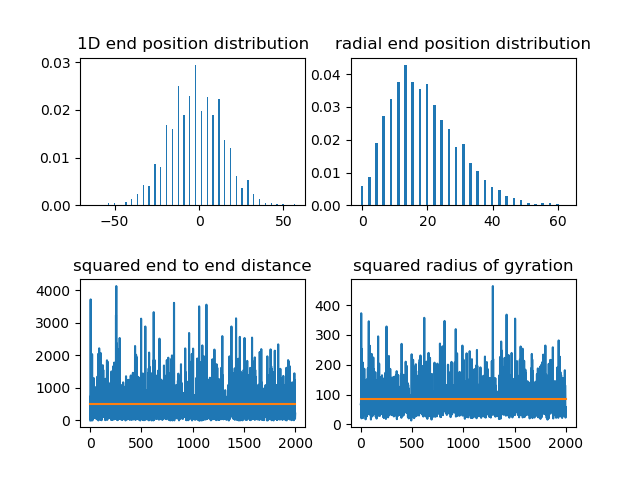

In [48]:
# visualize simple sampling end monomer distributions
figure()
subplot(221)

x = endPosXBins[0:-1]
y = endPosXHisto
bar(x,y, label="endposX histo")
title("1D end position distribution")

subplot(222)

x = endPosRBins[0:-1]
y = endPosRHisto
bar(x,y, label="endposX histo")
title("radial end position distribution")

subplot(223)
plot(np.linspace(0,len(Ree2),len(Ree2)),Ree2)
plot([0,len(Ree2)],[meanRee2,meanRee2])
title("squared end to end distance")

subplot(224)
plot(np.linspace(0,len(Rg2),len(Rg2)),Rg2)
plot([0,len(Rg2)],[meanRg2,meanRg2])
title("squared radius of gyration")

subplots_adjust(hspace=.5)

show()


In [7]:
# wrap simulations for R(N) calculations

In [8]:
# run simple sampling simulations for size scaling

In [9]:
# visualize simple sampling R(N) results

### Importance Sampling

In [1]:
# implementation of perform mcs in class random walker
+-o-+

+
| 
o-+

o--++  ->  ++--o


# choose a random position
# check if start or end -> move only end with step that does not change bond lenght
# if inner segment: check if straigth line -> no move possible / else move along diffs for a kink or a swith
# if time is left: sanity check for bond lengths and path length

autocorrelation function:

$c(\Delta t) = \frac{\langle R_e(t_0) * Re(t_0 + \Delta t)\rangle}{\langle Re^2 \rangle}$

In [78]:
def sampleReDt(n_iter,N):
    # setup walker
    impWalker = randomWalker(N)
    impWalker.createRandomPath()
    
    # initial result container
    firstRe = impWalker.getEndToEndDistanceVector()
    ReDt = [np.dot(firstRe,firstRe)]
    Re2 = [np.square(impWalker.getEndToEndDistance())]
    
    # run the simulations
    for i in range(n_iter-1):
        impWalker.performMCS(1)
        Re2.append(np.square(impWalker.getEndToEndDistance()))
        ReDt.append(np.dot(firstRe,impWalker.getEndToEndDistanceVector()))
        
    # average the Re2
    reMean = sum(Re2)/len(Re2)
    # return the results
    return reMean, np.array(ReDt)

In [ ]:
# run the ReDt sampling many times
s_time = 10000
n_sample = 100
N = 64

meanReDt = np.zeros(s_time)
reMean = 0.0

for n in range(n_sample):
    reC, redtC = sampleReDt(s_time, N)
    print(reC, redtC.size)
    reMean += reC
    meanReDt += redtC

reMean /= n_sample
meanReDt /= n_sample
print(reMean, meanReDt[:4])